# 📄 Receipt OCR and Order Lookup
This notebook extracts the order number from a receipt image using DocTR OCR, checks it against a dummy database, and returns the order status and details.

In [8]:
# ✅ Install Required Packages
!pip install python-doctr pymongo -q

In [9]:
!pip install matplotlib

In [10]:
# 🔍 Import Libraries
import re
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import matplotlib.pyplot as plt

# Dummy database (simulating MongoDB)
dummy_orders = {
    "ORD123": {"status": "Delivered", "details": {"product": "Mouse", "qty": 1}},
    "7865": {"status": "Shipped", "details": {"product": "Keyboard", "qty": 2}},
    "A45Z-88": {"status": "Pending", "details": {"product": "Monitor", "qty": 1}}
}

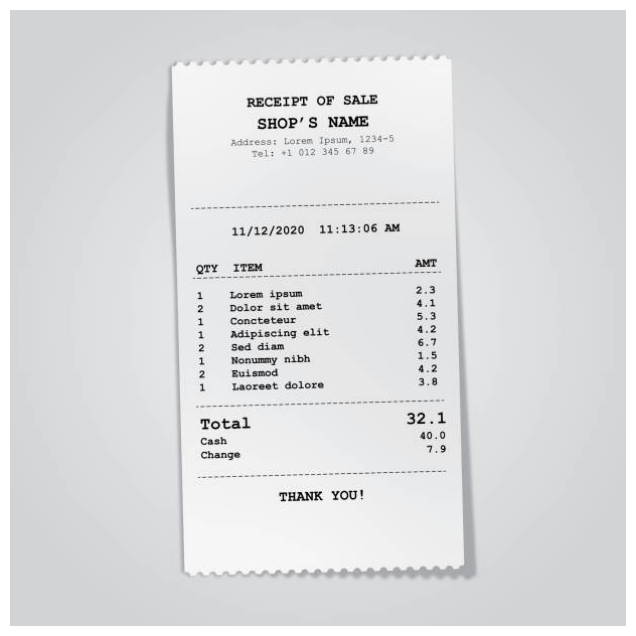

In [17]:
# 📸 Load and OCR Image
image_path = "reciept.jpg"  # Replace with actual image path
doc = DocumentFile.from_images(image_path)
model = ocr_predictor(pretrained=True)
result = model(doc)

# Display Image and OCR overlay
plt.figure(figsize=(12, 8))
plt.imshow(doc[0])
result.render()
plt.axis('off')
plt.show()

In [13]:
# 📄 Extract Full Text from Image
text_output = result.render()
print("\nExtracted Text:\n")
print(text_output)


Extracted Text:

RECEIPT OF SALE
SHOP'S NAME
Address: Lorem Ipaum, 1234-5
Tel: +1 012 345 67 89
11/12/2020 11:13:06 AM
QTY ITEM
AMT
1
Lorem psum
2.3
2
Dolor sit amet
4.1
1
Concteteur
5.3
1
Adipiscing elit
4.2
2
Sed diam
6.7
1
Nonummy nibh
1.5
2
Euismod
4.2
1
Laoreet dolore
3.8
Total
32.1
40.0
Cash
7.9
Change
THANK YOU!


In [14]:
# 🔎 Extract Order Number using Regex
match = re.search(r"(?i)order\s*(?:no\.?|number)?\s*#?:?\s*([\w-]+)", text_output)
if match:
    order_number = match.group(1)
    print(f"✅ Detected Order Number: {order_number}")
else:
    order_number = None
    print("❌ No order number found. Please send a valid receipt image.")

❌ No order number found. Please send a valid receipt image.


In [15]:
# 📦 Check Order in Dummy Database
if order_number:
    order_info = dummy_orders.get(order_number)
    if order_info:
        response = {
            "status": "success",
            "message": f"Order {order_number} found.",
            "order_details": order_info
        }
    else:
        response = {
            "status": "error",
            "message": f"Order {order_number} not found in database."
        }
else:
    response = {
        "status": "error",
        "message": "No valid order number found in the image. Please send a proper receipt."
    }

print("\n📤 JSON Response:")
print(response)


📤 JSON Response:
{'status': 'error', 'message': 'No valid order number found in the image. Please send a proper receipt.'}
